In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import read_csv
sns.set_style('white')
sns.set_context('notebook', font_scale=1.25)
%matplotlib inline

## Robot Factory (Version 1)

### Load and prepare data

In [2]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Load and prepare data.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Load data and restrict to version 1.
data = read_csv(os.path.join('data','data.csv')).query('Version==1')

## Define robot identities.
data.loc[np.logical_and(data.Valence=='Win',data.Action=='Go'),'Robot'] = 'GW'
data.loc[np.logical_and(data.Valence=='Win',data.Action=='No-Go'),'Robot'] = 'NGW'
data.loc[np.logical_and(data.Valence=='Lose',data.Action=='Go'),'Robot'] = 'GAL'
data.loc[np.logical_and(data.Valence=='Lose',data.Action=='No-Go'),'Robot'] = 'NGAL'

## Define exposure.
f = lambda x: np.arange(x.size)+1
data['Exposure'] = data.groupby(['Subject','Robot']).Trial.transform(f)

### Plot Accuracy by Exposure

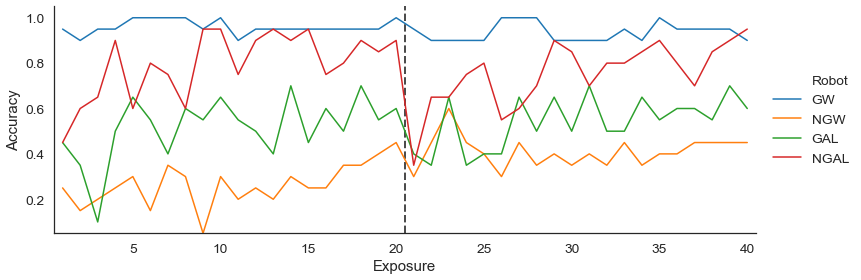

In [3]:
## Initialize canvas.
fig, ax = plt.subplots(1,1,figsize=(12,4))
palette = sns.color_palette(n_colors=4)

## Plot accuracy.
sns.lineplot('Exposure', 'Accuracy', 'Robot', data=data, hue_order=['GW','NGW','GAL','NGAL'], 
             palette=palette, ci=None, ax=ax)

## Add details.
ax.set(xlim=(0.5,40.5), ylim=(0.05,1.05))
ax.axvline(20.5,color='k',lw=2,linestyle='--',alpha=0.7,zorder=-1)
ax.legend(loc=7, bbox_to_anchor=(1.15,0.5), frameon=False)

sns.despine()
plt.tight_layout()

### Plot Accuracy by Participant

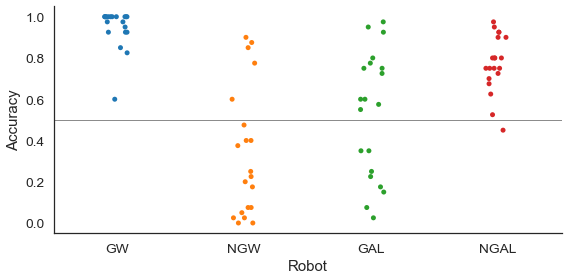

In [4]:
## Initialize canvas.
fig, ax = plt.subplots(1,1,figsize=(8,4))
palette = sns.color_palette(n_colors=4)

## Plot accuracy.
gb = data.groupby(['Subject','Robot']).Accuracy.mean().reset_index()
sns.stripplot('Robot', 'Accuracy', data=gb, order=['GW','NGW','GAL','NGAL'], palette=palette)
ax.axhline(0.50, color='0.1', lw=0.5)
ax.set(ylim=(-0.05,1.05))

sns.despine()
plt.tight_layout()

## Robot Factory (Version 2)

### Load and prepare data

In [10]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Load and prepare data.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Load data and restrict to version 1.
data = read_csv(os.path.join('data','data.csv')).query('Version==2')

## Define robot identities.
data['Robot'] = data.Robot.replace({1:'GW',2:'NGW',3:'GAL',4:'NGAL'})

## Define exposure.
f = lambda x: np.arange(x.size)+1
data['Exposure'] = data.groupby(['Subject','Robot']).Trial.transform(f)

### Plot Accuracy by Exposure

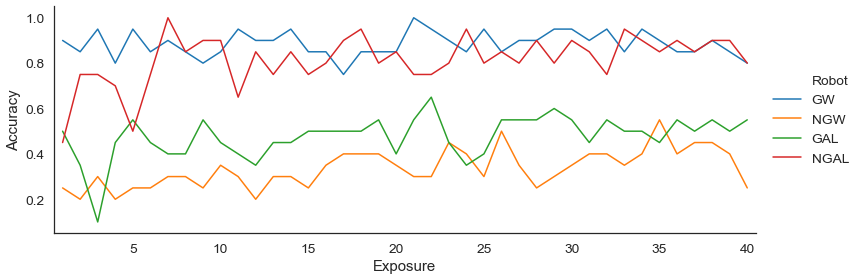

In [11]:
## Initialize canvas.
fig, ax = plt.subplots(1,1,figsize=(12,4))
palette = sns.color_palette(n_colors=4)

## Plot accuracy.
sns.lineplot('Exposure', 'Accuracy', 'Robot', data=data, hue_order=['GW','NGW','GAL','NGAL'], 
             palette=palette, ci=None, ax=ax)

## Add details.
ax.set(xlim=(0.5,40.5), ylim=(0.05,1.05))
ax.legend(loc=7, bbox_to_anchor=(1.15,0.5), frameon=False)

sns.despine()
plt.tight_layout()

### Plot Accuracy by Participant

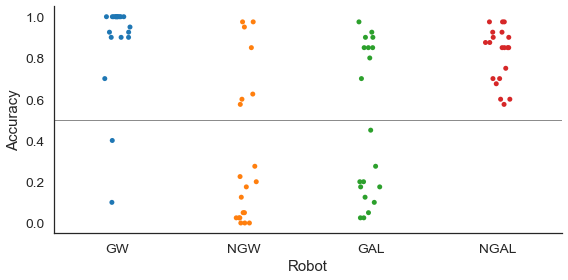

In [7]:
## Initialize canvas.
fig, ax = plt.subplots(1,1,figsize=(8,4))
palette = sns.color_palette(n_colors=4)

## Plot accuracy.
gb = data.groupby(['Subject','Robot']).Accuracy.mean().reset_index()
sns.stripplot('Robot', 'Accuracy', data=gb, order=['GW','NGW','GAL','NGAL'], palette=palette)
ax.axhline(0.50, color='0.1', lw=0.5)
ax.set(ylim=(-0.05,1.05))

sns.despine()
plt.tight_layout()

In [50]:
data.query('Subject=="60p3rctjhyoirvzspqmzzgb3" and Robot=="GAL"')

,Subject,Version,Block,Trial,Valence,Action,Robot,Rune,Correct,Choice,RT,Accuracy,Sham,Outcome,TotalKeys,Exposure
3681,60p3rctjhyoirvzspqmzzgb3,2,1,2,Lose,Go,GAL,5.0,1,0,NaN,0,0,-10,0.0,1
3684,60p3rctjhyoirvzspqmzzgb3,2,1,5,Lose,Go,GAL,5.0,1,0,NaN,0,1,0,0.0,2
3689,60p3rctjhyoirvzspqmzzgb3,2,1,10,Lose,Go,GAL,5.0,1,0,NaN,0,0,-10,0.0,3
3694,60p3rctjhyoirvzspqmzzgb3,2,1,15,Lose,Go,GAL,5.0,1,0,NaN,0,0,-10,0.0,4
3697,60p3rctjhyoirvzspqmzzgb3,2,1,18,Lose,Go,GAL,5.0,1,1,0.413,1,0,0,3.0,5
3703,60p3rctjhyoirvzspqmzzgb3,2,1,24,Lose,Go,GAL,5.0,1,0,NaN,0,0,-10,0.0,6
3706,60p3rctjhyoirvzspqmzzgb3,2,1,27,Lose,Go,GAL,5.0,1,0,NaN,0,0,-10,0.0,7
3708,60p3rctjhyoirvzspqmzzgb3,2,1,29,Lose,Go,GAL,5.0,1,0,NaN,0,0,-10,0.0,8
3715,60p3rctjhyoirvzspqmzzgb3,2,1,36,Lose,Go,GAL,5.0,1,1,0.080,1,1,-10,3.0,9
3717,60p3rctjhyoirvzspqmzzgb3,2,1,38,Lose,Go,GAL,5.0,1,0,NaN,0,0,-10,2.0,10


In [49]:
data.query('Robot=="GAL"').groupby(['Subject','Robot']).Accuracy.mean().sort_values()

Subject                   Robot
4deb3co8avbcrw0pawlsdorq  GAL      0.025
60ps01lk2rbnmcgahtka1nq2  GAL      0.025
r4pw8hqqxzrolbjbfm6dg8hz  GAL      0.050
epp7teulyyew4abfe4yqmw0v  GAL      0.100
f80j5kguz0kzb6jejbmskmfv  GAL      0.125
yaudi4ebrx7f6rekxliie3b1  GAL      0.175
jewffmlf5xezpovrwav519sp  GAL      0.175
60p3rctjhyoirvzspqmzzgb3  GAL      0.200
h75onlxjjlc1sumz3bucinlz  GAL      0.200
nfer18u8g72rnlxpcz1cjppz  GAL      0.275
jn2kth5a4sszl58giis17yzv  GAL      0.450
zt6rath0nosne25pc0t28g66  GAL      0.700
2qc01up7z92d4unvafei3tj5  GAL      0.800
slc7rds6or7cljlmd4aayd4z  GAL      0.850
z8ttfemyp3342ajl83mio3xq  GAL      0.850
i3s8ajqovg6cy9hsdvta7ne7  GAL      0.850
g8xe4lym5ao538zatlg8xse0  GAL      0.900
2xcj06ij576i0hg5wu6nhdfw  GAL      0.900
yu5mzpwmcles0uof1i05zyhk  GAL      0.925
txgojfa3ev7v7cp4oxuzb1d6  GAL      0.975
Name: Accuracy, dtype: float64

## List of questions
1. Make sure accuracy coded correctly. You should play one block of the task and make sure it works.
2. Might need to provide accuracy feedback (maybe "Great job!" is a bias?)
3. Possible that people speeding through the task? But then wouldn't they be doing better in GAL?

## Possible analyses
1. Responsiveness to feedback

In [12]:
metadata = read_csv('data/metadata.csv')

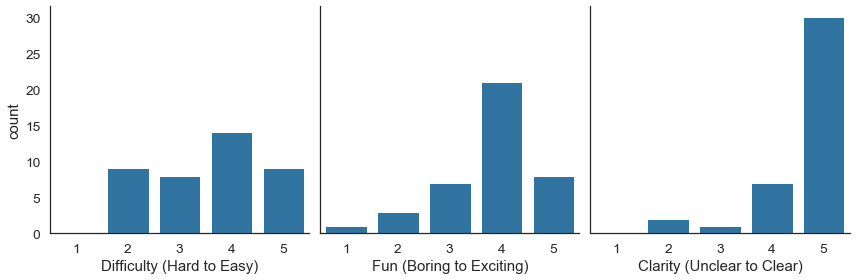

In [29]:
fig, axes = plt.subplots(1,3,figsize=(12,4),sharex=True,sharey=True)

sns.countplot('difficulty', data=metadata, order=[1,2,3,4,5], color='#1f77b4', ax=axes[0])
axes[0].set(xlabel='Difficulty (Hard to Easy)')

sns.countplot('fun', data=metadata, order=[1,2,3,4,5], color='#1f77b4', ax=axes[1])
axes[1].set(xlabel='Fun (Boring to Exciting)', ylabel='')

sns.countplot('clarity', data=metadata, order=[1,2,3,4,5], color='#1f77b4', ax=axes[2])
axes[2].set(xlabel='Clarity (Unclear to Clear)', ylabel='')

sns.despine()
plt.tight_layout()

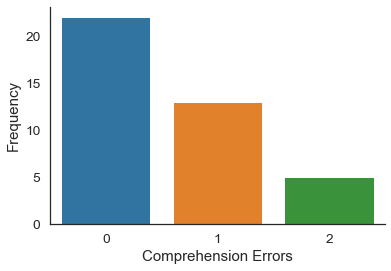

In [33]:
ax = sns.countplot('Comp-Errors', data=metadata)
ax.set(xlabel='Comprehension Errors', ylabel='Frequency')
sns.despine()

In [37]:
test = np.where(data['TotalKeys'] > 1, '+2', data['TotalKeys'].astype(int).astype(str))

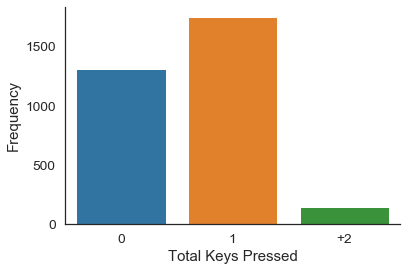

In [41]:
ax = sns.countplot(test, order=['0','1','+2'])
ax.set(xlabel='Total Keys Pressed', ylabel='Frequency')
sns.despine()